# F1 Standings Prediction

# Importing Libraries and Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [34]:
# Loading the dataset
file_path = "f1_enhanced_race_data_final.csv"
df = pd.read_csv(file_path)

In [35]:
df.head()

,Season,Round,Race Name,Circuit Name,Location,Race Date,Driver Name,Driver ID,Driver Nationality,Constructor,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Fernando Alonso,alonso,Spanish,Ferrari,...,1:54.608,3,1,Finished,1:39:20.396,25.0,49,25.0,0,No Pitstops
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Felipe Massa,massa,Brazilian,Ferrari,...,1:54.242,2,2,Finished,+16.099,18.0,49,18.0,0,No Pitstops
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Lewis Hamilton,hamilton,British,McLaren,...,1:55.217,4,3,Finished,+23.182,15.0,49,15.0,0,No Pitstops
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Sebastian Vettel,vettel,German,Red Bull,...,1:54.101,1,4,Finished,+38.799,12.0,49,12.0,0,No Pitstops
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Nico Rosberg,rosberg,German,Mercedes,...,1:55.241,5,5,Finished,+40.213,10.0,49,10.0,0,No Pitstops


# Feature Engineering

#### 1. Drop primary key-type columns (non-useful unique identifiers)

In [36]:
columns_to_drop = ["Driver Name", "Race Date"]  # Assuming these are unique identifiers
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

In [37]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,alonso,Spanish,Ferrari,3.0,1:54.612,...,1:54.608,3,1,Finished,1:39:20.396,25.0,49,25.0,0,No Pitstops
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,massa,Brazilian,Ferrari,2.0,1:55.313,...,1:54.242,2,2,Finished,+16.099,18.0,49,18.0,0,No Pitstops
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,hamilton,British,McLaren,4.0,1:55.341,...,1:55.217,4,3,Finished,+23.182,15.0,49,15.0,0,No Pitstops
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,vettel,German,Red Bull,1.0,1:55.029,...,1:54.101,1,4,Finished,+38.799,12.0,49,12.0,0,No Pitstops
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,rosberg,German,Mercedes,5.0,1:55.463,...,1:55.241,5,5,Finished,+40.213,10.0,49,10.0,0,No Pitstops


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6436 non-null   int64  
 1   Round                   6436 non-null   int64  
 2   Race Name               6436 non-null   object 
 3   Circuit Name            6436 non-null   object 
 4   Location                6436 non-null   object 
 5   Race Date               6436 non-null   object 
 6   Driver Name             6436 non-null   object 
 7   Driver ID               6436 non-null   object 
 8   Driver Nationality      6436 non-null   object 
 9   Constructor             6436 non-null   object 
 10  Qualifying Position     6412 non-null   float64
 11  Q1 Time                 6350 non-null   object 
 12  Q2 Time                 4669 non-null   object 
 13  Q3 Time                 2941 non-null   object 
 14  Starting Grid Position  6436 non-null   

In [39]:
df.isnull().sum()

Season                       0
Round                        0
Race Name                    0
Circuit Name                 0
Location                     0
Race Date                    0
Driver Name                  0
Driver ID                    0
Driver Nationality           0
Constructor                  0
Qualifying Position         24
Q1 Time                     86
Q2 Time                   1767
Q3 Time                   3495
Starting Grid Position       0
Final Position               0
Finishing Status             0
Time/Status                  0
Points                       0
Laps Completed               0
Driver Total Points          4
Pit Stop Count               0
Pit Stop Details             0
dtype: int64

#### 2. Handle missing values: Fill numerical with median, categorical wiath mode

In [40]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

In [41]:
df_cleaned.isnull().sum()

Season                    0
Round                     0
Race Name                 0
Circuit Name              0
Location                  0
Driver ID                 0
Driver Nationality        0
Constructor               0
Qualifying Position       0
Q1 Time                   0
Q2 Time                   0
Q3 Time                   0
Starting Grid Position    0
Final Position            0
Finishing Status          0
Time/Status               0
Points                    0
Laps Completed            0
Driver Total Points       0
Pit Stop Count            0
Pit Stop Details          0
dtype: int64

In [42]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,alonso,Spanish,Ferrari,3.0,1:54.612,...,1:54.608,3,1,Finished,1:39:20.396,25.0,49,25.0,0,No Pitstops
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,massa,Brazilian,Ferrari,2.0,1:55.313,...,1:54.242,2,2,Finished,+16.099,18.0,49,18.0,0,No Pitstops
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,hamilton,British,McLaren,4.0,1:55.341,...,1:55.217,4,3,Finished,+23.182,15.0,49,15.0,0,No Pitstops
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,vettel,German,Red Bull,1.0,1:55.029,...,1:54.101,1,4,Finished,+38.799,12.0,49,12.0,0,No Pitstops
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,rosberg,German,Mercedes,5.0,1:55.463,...,1:55.241,5,5,Finished,+40.213,10.0,49,10.0,0,No Pitstops


#### 3. Convert categorical values to numerical using label encoding

In [43]:
unwanted_columns = ['Pit Stop Details', 'Q1 Time', 'Q2 Time', 'Q3 Time']
label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if column not in unwanted_columns :
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])
        label_encoders[column] = le

In [44]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,5,7,23,3,23,5,3.0,1:54.612,...,1:54.608,3,1,36,3200,25.0,49,25.0,0,No Pitstops
1,2010,1,5,7,23,44,5,5,2.0,1:55.313,...,1:54.242,2,2,36,290,18.0,49,18.0,0,No Pitstops
2,2010,1,5,7,23,25,6,13,4.0,1:55.341,...,1:55.217,4,3,36,1486,15.0,49,15.0,0,No Pitstops
3,2010,1,5,7,23,75,13,17,1.0,1:55.029,...,1:54.101,1,4,36,2048,12.0,49,12.0,0,No Pitstops
4,2010,1,5,7,23,62,13,14,5.0,1:55.463,...,1:55.241,5,5,36,2137,10.0,49,10.0,0,No Pitstops


#### 4. Converting mintues (object type) to secs (float type) in qualifiers time columns

In [45]:
qualifiers = ['Q1 Time', 'Q2 Time', 'Q3 Time']

for col in qualifiers:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: float(x.split(':')[0]) * 60 + float(x.split(':')[1]))

In [46]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,5,7,23,3,23,5,3.0,114.612,...,114.608,3,1,36,3200,25.0,49,25.0,0,No Pitstops
1,2010,1,5,7,23,44,5,5,2.0,115.313,...,114.242,2,2,36,290,18.0,49,18.0,0,No Pitstops
2,2010,1,5,7,23,25,6,13,4.0,115.341,...,115.217,4,3,36,1486,15.0,49,15.0,0,No Pitstops
3,2010,1,5,7,23,75,13,17,1.0,115.029,...,114.101,1,4,36,2048,12.0,49,12.0,0,No Pitstops
4,2010,1,5,7,23,62,13,14,5.0,115.463,...,115.241,5,5,36,2137,10.0,49,10.0,0,No Pitstops


#### 5. Dropping Time/Status column

In [47]:
df_cleaned.drop('Time/Status', inplace=True, axis=1)

In [48]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6436 non-null   int64  
 1   Round                   6436 non-null   int64  
 2   Race Name               6436 non-null   int64  
 3   Circuit Name            6436 non-null   int64  
 4   Location                6436 non-null   int64  
 5   Driver ID               6436 non-null   int64  
 6   Driver Nationality      6436 non-null   int64  
 7   Constructor             6436 non-null   int64  
 8   Qualifying Position     6436 non-null   float64
 9   Q1 Time                 6436 non-null   float64
 10  Q2 Time                 6436 non-null   float64
 11  Q3 Time                 6436 non-null   float64
 12  Starting Grid Position  6436 non-null   int64  
 13  Final Position          6436 non-null   int64  
 14  Finishing Status        6436 non-null   

<Axes: xlabel='Points'>

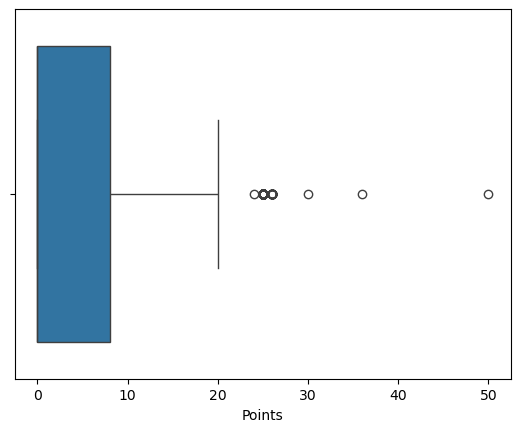

In [26]:
sns.boxplot(x=df['Points'])

In [49]:
# Remove outliers that are more than 25
df_cleaned = df_cleaned[df_cleaned['Points'] <= 25]

<Axes: xlabel='Points'>

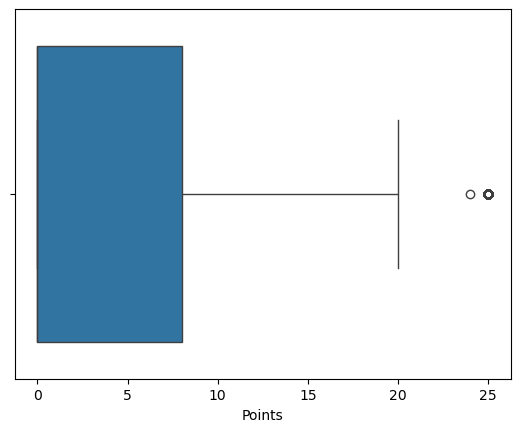

In [28]:
sns.boxplot(x=df_cleaned['Points'])

In [29]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,Q2 Time,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,5,7,23,3,23,5,3.0,114.612,114.172,114.608,3,1,36,25.0,49,25.0,0,No Pitstops
1,2010,1,5,7,23,44,5,5,2.0,115.313,114.331,114.242,2,2,36,18.0,49,18.0,0,No Pitstops
2,2010,1,5,7,23,25,6,13,4.0,115.341,114.707,115.217,4,3,36,15.0,49,15.0,0,No Pitstops
3,2010,1,5,7,23,75,13,17,1.0,115.029,113.883,114.101,1,4,36,12.0,49,12.0,0,No Pitstops
4,2010,1,5,7,23,62,13,14,5.0,115.463,114.682,115.241,5,5,36,10.0,49,10.0,0,No Pitstops


#### 6. Processing pitstop details column

In [31]:
df_cleaned['Pit Stop Count'].unique()

array([0, 2, 3, 1, 4, 6, 5, 7])

In [32]:
# Function to process pit stop details into separate columns
def process_pit_stop_details(details, max_pitstops):
    lap_columns = [f"Pitstop_{i+1}_Lap" for i in range(max_pitstops)]
    duration_columns = [f"Pitstop_{i+1}_Duration" for i in range(max_pitstops)]
    
    # Initialize empty columns
    processed_data = {col: [] for col in lap_columns + duration_columns}

    for detail in details:
        # Handle No Pitstops rows
        if detail == "No Pitstops":
            for i in range(max_pitstops):
                processed_data[f"Pitstop_{i+1}_Lap"].append(0)
                processed_data[f"Pitstop_{i+1}_Duration"].append(0)
        else:
            # Split individual pit stops
            stops = detail.split(";")
            
            for i in range(max_pitstops):
                if i < len(stops) and stops[i].strip():
                    stop_info = stops[i]
                    lap = int(stop_info.split("@Lap ")[1].split("(")[0].strip())
                    duration_str = stop_info.split("Duration=")[1].replace("s", "").strip("()")

                    # Convert duration to seconds if it's in MM:SS.mmm format
                    if ":" in duration_str:
                        minutes, seconds = map(float, duration_str.split(":"))
                        duration = minutes * 60 + seconds
                    else:
                        duration = float(duration_str)

                    processed_data[f"Pitstop_{i+1}_Lap"].append(lap)
                    processed_data[f"Pitstop_{i+1}_Duration"].append(duration)
                else:
                    # Fill missing stops with 0
                    processed_data[f"Pitstop_{i+1}_Lap"].append(0)
                    processed_data[f"Pitstop_{i+1}_Duration"].append(0)
    
    return pd.DataFrame(processed_data)

In [33]:
# Apply transformation
processed_pitstops = process_pit_stop_details(df_cleaned["Pit Stop Details"], max_pitstops=7)

In [34]:
processed_pitstops.tail()

,Pitstop_1_Lap,Pitstop_2_Lap,Pitstop_3_Lap,Pitstop_4_Lap,Pitstop_5_Lap,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration
6391,12,29,30,55,0,0,0,26.363,21.678,22.815,22.09,0.0,0.0,0.0
6392,23,24,29,0,0,0,0,23.415,22.565,32.317,0.00,0.0,0.0,0.0
6393,6,0,0,0,0,0,0,41.144,0.000,0.000,0.00,0.0,0.0,0.0
6394,3,0,0,0,0,0,0,24.941,0.000,0.000,0.00,0.0,0.0,0.0
6395,0,0,0,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0.0,0.0


In [35]:
# Combine with original data
final_df_cleaned = pd.concat([df_cleaned, processed_pitstops], axis=1)

In [36]:
final_df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Pitstop_5_Lap,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration
0,2010.0,1.0,5.0,7.0,23.0,3.0,23.0,5.0,3.0,114.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010.0,1.0,5.0,7.0,23.0,44.0,5.0,5.0,2.0,115.313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010.0,1.0,5.0,7.0,23.0,25.0,6.0,13.0,4.0,115.341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010.0,1.0,5.0,7.0,23.0,75.0,13.0,17.0,1.0,115.029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010.0,1.0,5.0,7.0,23.0,62.0,13.0,14.0,5.0,115.463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6436 entries, 0 to 6356
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6396 non-null   float64
 1   Round                   6396 non-null   float64
 2   Race Name               6396 non-null   float64
 3   Circuit Name            6396 non-null   float64
 4   Location                6396 non-null   float64
 5   Driver ID               6396 non-null   float64
 6   Driver Nationality      6396 non-null   float64
 7   Constructor             6396 non-null   float64
 8   Qualifying Position     6396 non-null   float64
 9   Q1 Time                 6396 non-null   float64
 10  Q2 Time                 6396 non-null   float64
 11  Q3 Time                 6396 non-null   float64
 12  Starting Grid Position  6396 non-null   float64
 13  Final Position          6396 non-null   float64
 14  Finishing Status        6396 non-null   float

In [38]:
final_df_cleaned.drop(['Pit Stop Details', 'Driver Nationality'], axis=1, inplace=True)

#### 7. Re-arranging Columns

In [40]:
# re-arranging Columns
target_col = 'Final Position'
columns = [col for col in final_df_cleaned.columns if col != target_col] + [target_col]
final_df_cleaned = final_df_cleaned[columns]

In [41]:
final_df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position
0,2010.0,1.0,5.0,7.0,23.0,3.0,5.0,3.0,114.612,114.172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2010.0,1.0,5.0,7.0,23.0,44.0,5.0,2.0,115.313,114.331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2010.0,1.0,5.0,7.0,23.0,25.0,13.0,4.0,115.341,114.707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,2010.0,1.0,5.0,7.0,23.0,75.0,17.0,1.0,115.029,113.883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2010.0,1.0,5.0,7.0,23.0,62.0,14.0,5.0,115.463,114.682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [42]:
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6436 entries, 0 to 6356
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6396 non-null   float64
 1   Round                   6396 non-null   float64
 2   Race Name               6396 non-null   float64
 3   Circuit Name            6396 non-null   float64
 4   Location                6396 non-null   float64
 5   Driver ID               6396 non-null   float64
 6   Constructor             6396 non-null   float64
 7   Qualifying Position     6396 non-null   float64
 8   Q1 Time                 6396 non-null   float64
 9   Q2 Time                 6396 non-null   float64
 10  Q3 Time                 6396 non-null   float64
 11  Starting Grid Position  6396 non-null   float64
 12  Finishing Status        6396 non-null   float64
 13  Points                  6396 non-null   float64
 14  Laps Completed          6396 non-null   float

#### 8. Save the cleaned dataset

In [ ]:
final_df_cleaned.to_csv("cleaned_f1_data.csv", index=False)

# Exploratory Data Analysis

In [32]:
final_df_cleaned = pd.read_csv("cleaned_f1_data.csv")
final_df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


#### 1. Distribution of Finishing Positions

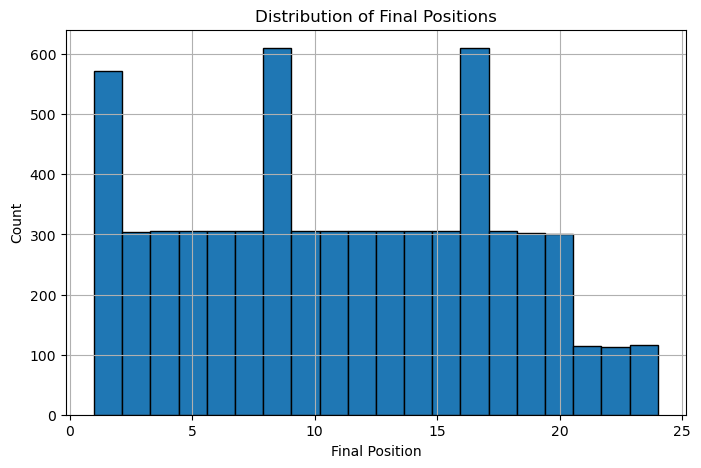

In [47]:
plt.figure(figsize=(8, 5))
final_df_cleaned["Final Position"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Final Positions")
plt.xlabel("Final Position")
plt.ylabel("Count")
plt.show()

#### 2. Number of Races per Season

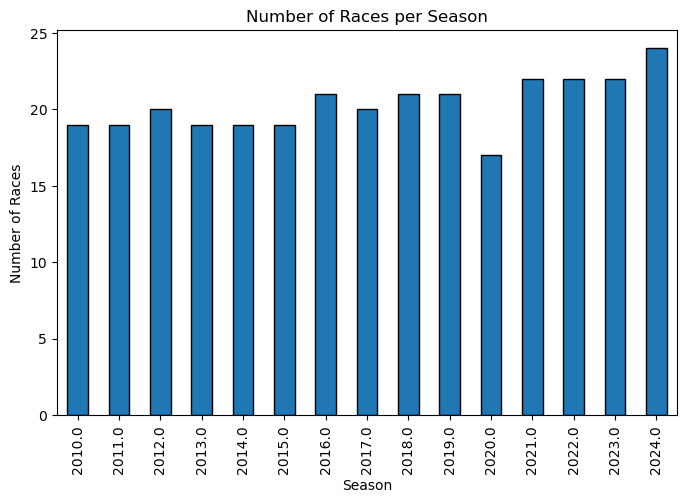

In [49]:
plt.figure(figsize=(8, 5))
final_df_cleaned.groupby("Season")["Race Name"].nunique().plot(kind="bar", edgecolor="black")
plt.title("Number of Races per Season")
plt.xlabel("Season")
plt.ylabel("Number of Races")
plt.show()

#### 3. Constructor Performance (Average Points per Constructor)

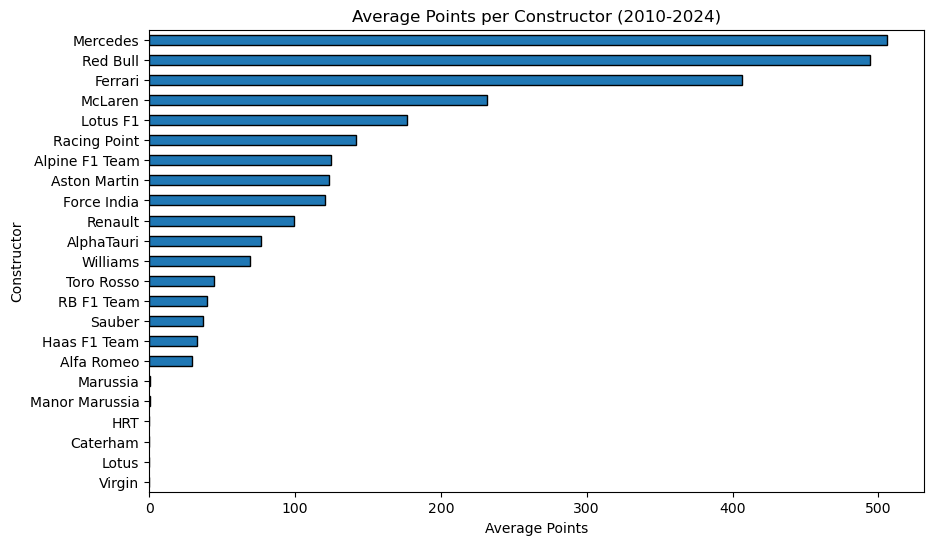

In [51]:
plt.figure(figsize=(10, 6))
constructor_points = df.groupby(["Season", "Constructor"])["Points"].sum().groupby("Constructor").mean()
constructor_points.sort_values().plot(kind="barh", edgecolor="black")
plt.title("Average Points per Constructor (2010-2024)")
plt.xlabel("Average Points")
plt.ylabel("Constructor")
plt.show()

#### 4. Total points scored across all constructors in each season from 2010 to 2024

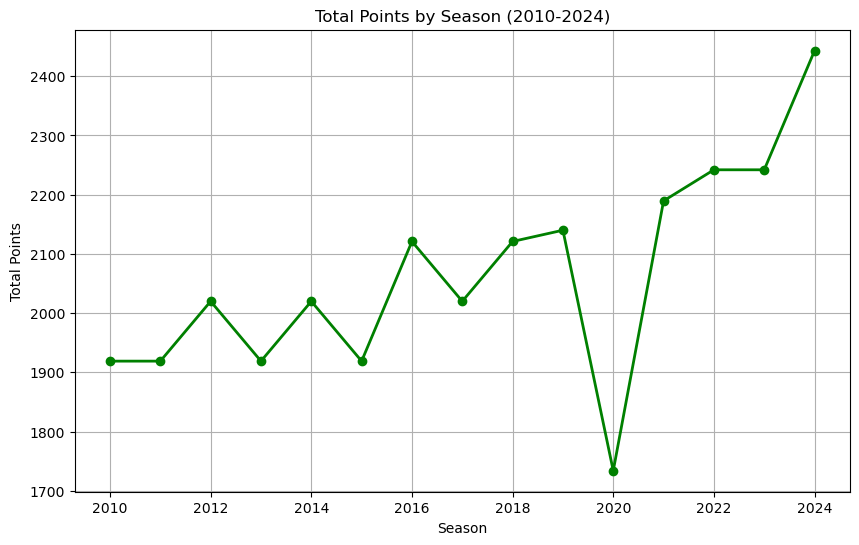

In [53]:
plt.figure(figsize=(10, 6))
total_points_by_season = df.groupby("Season")["Points"].sum()
total_points_by_season.plot(kind="line", marker="o", color="green", linewidth=2)
plt.title("Total Points by Season (2010-2024)")
plt.xlabel("Season")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

#### 5. Average Laps Completed by Constructors

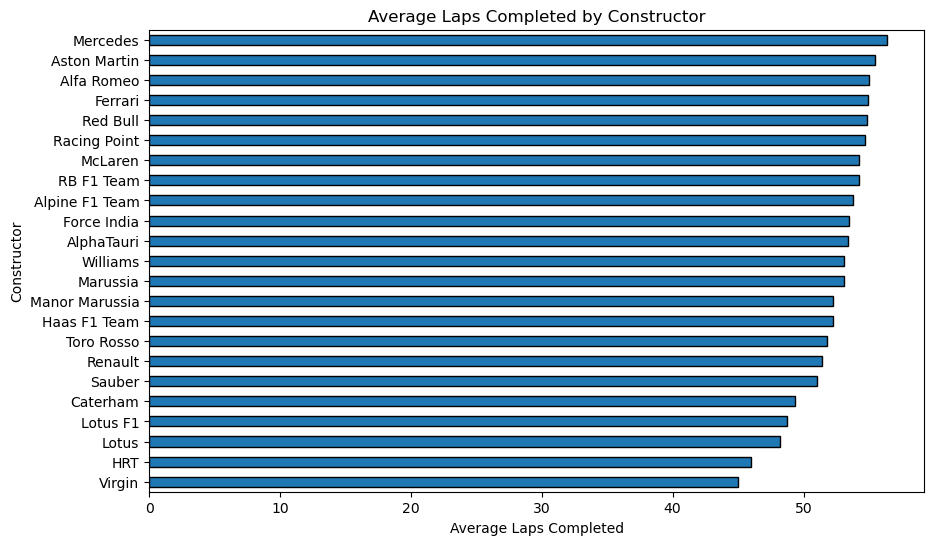

In [55]:
plt.figure(figsize=(10, 6))
df.groupby("Constructor")["Laps Completed"].mean().sort_values().plot(kind="barh", edgecolor="black")
plt.title("Average Laps Completed by Constructor")
plt.xlabel("Average Laps Completed")
plt.ylabel("Constructor")
plt.show()

#### 6. Finishing Status Distribution

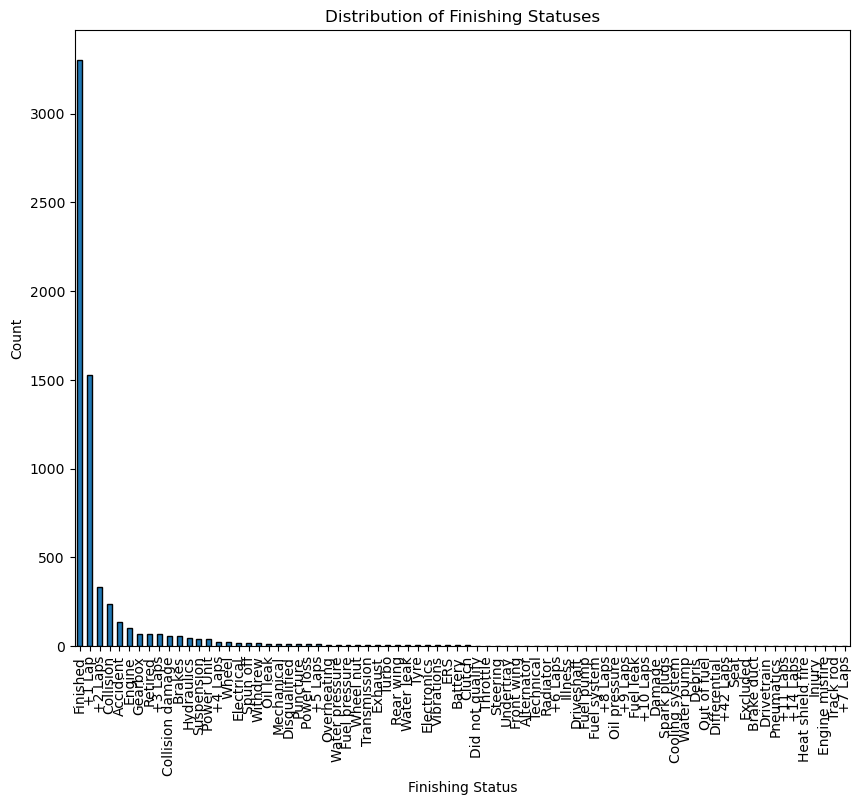

In [57]:
plt.figure(figsize=(10, 8))
df["Finishing Status"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribution of Finishing Statuses")
plt.xlabel("Finishing Status")
plt.ylabel("Count")
plt.show()

#### 7. Correlation Heatmap

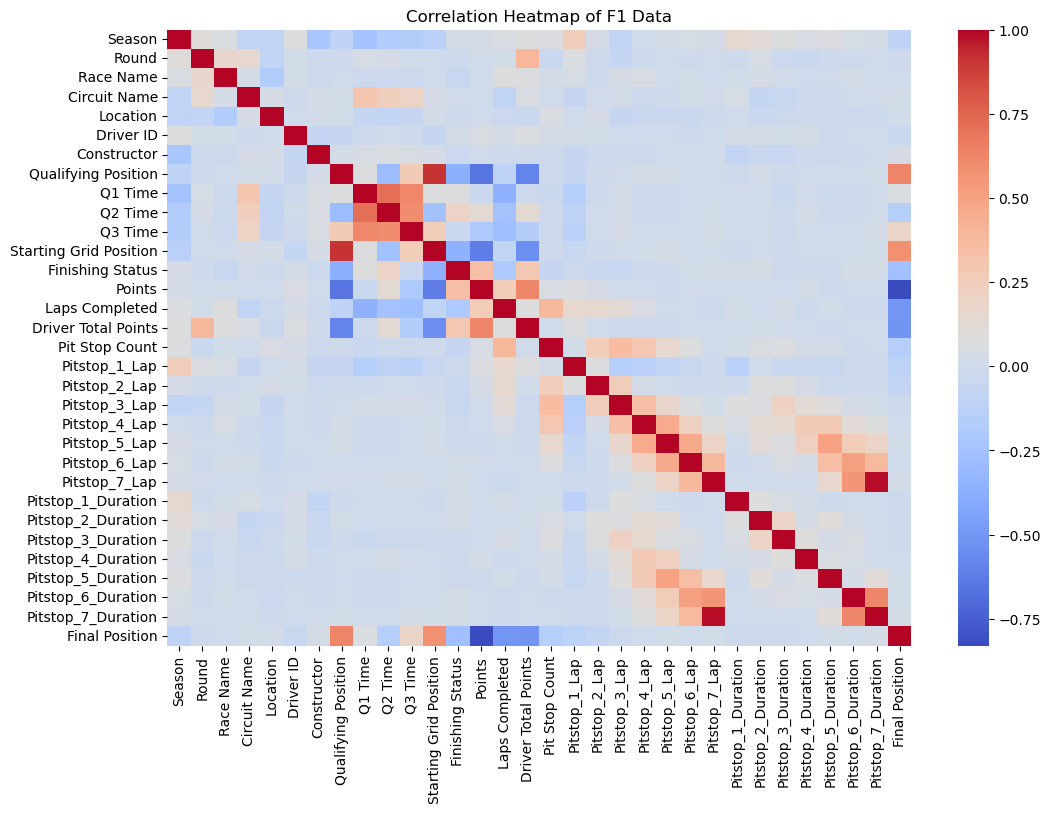

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of F1 Data")
plt.show()

#### 8. Points Distribution

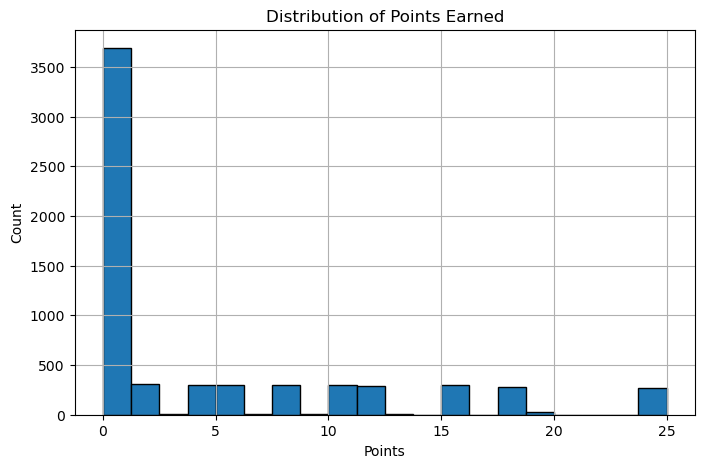

In [61]:
plt.figure(figsize=(8, 5))
final_df_cleaned["Points"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Points Earned")
plt.xlabel("Points")
plt.ylabel("Count")
plt.show()

#### 9. Qualifying Position vs Final Position

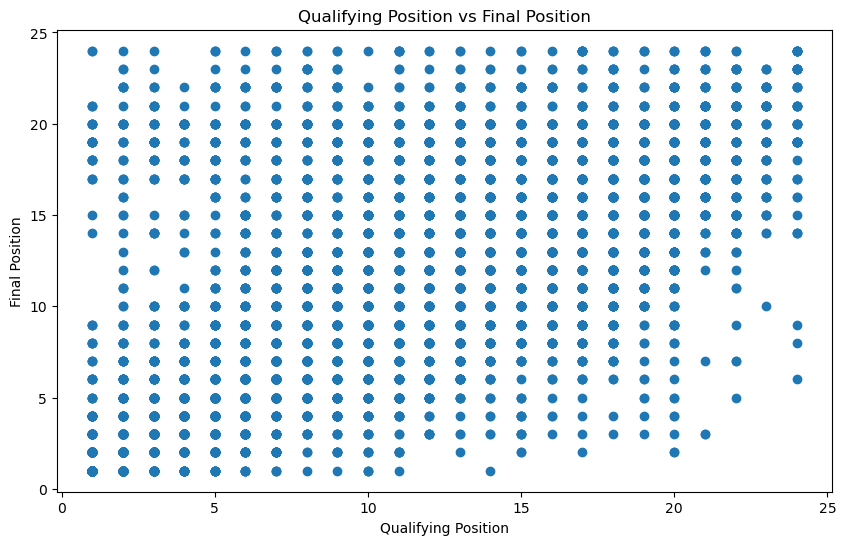

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df_cleaned["Qualifying Position"], df_cleaned["Final Position"])
plt.title("Qualifying Position vs Final Position")
plt.xlabel("Qualifying Position")
plt.ylabel("Final Position")
plt.show()

#### 10. Effect of Laps Completed on Points Earned

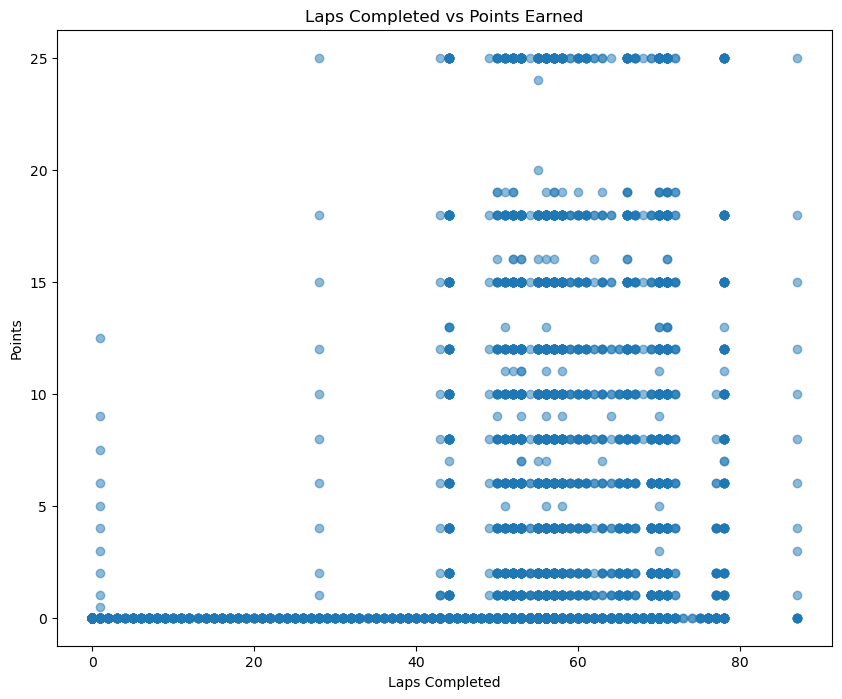

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned["Laps Completed"], df_cleaned["Points"], alpha=0.5)
plt.title("Laps Completed vs Points Earned")
plt.xlabel("Laps Completed")
plt.ylabel("Points")
plt.show()

# Model Training

### 1. PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Loading cleaned dataset
df = pd.read_csv("cleaned_f1_data.csv")

In [9]:
df.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [11]:
df.isna()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [15]:
df_scaled

array([[-1.57241503, -1.62688397, -1.04241242, ..., -0.03145517,
        -0.02137007, -1.65105595],
       [-1.57241503, -1.62688397, -1.04241242, ..., -0.03145517,
        -0.02137007, -1.48879175],
       [-1.57241503, -1.62688397, -1.04241242, ..., -0.03145517,
        -0.02137007, -1.32652756],
       ...,
       [ 1.59797815,  2.23199457, -1.38705878, ..., -0.03145517,
        -0.02137007,  1.10743538],
       [ 1.59797815,  2.23199457, -1.38705878, ..., -0.03145517,
        -0.02137007,  1.26969957],
       [ 1.59797815,  2.23199457, -1.38705878, ..., -0.03145517,
        -0.02137007,  1.43196377]])

In [17]:
# Applying PCA with 2 and 3 components
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

df_pca_2 = pca_2.fit_transform(df_scaled)
df_pca_3 = pca_3.fit_transform(df_scaled)

In [19]:
# Explained variance ratios
explained_variance_2D = np.sum(pca_2.explained_variance_ratio_) * 100
explained_variance_3D = np.sum(pca_3.explained_variance_ratio_) * 100

print(f"Variance retained in 2D PCA: {explained_variance_2D:.2f}%")
print(f"Variance retained in 3D PCA: {explained_variance_3D:.2f}%")

Variance retained in 2D PCA: 22.70%
Variance retained in 3D PCA: 31.41%


In [21]:
# Finding number of dimensions to retain 95% variance
pca_full = PCA()
pca_full.fit(df_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

In [23]:
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required to retain 95% variance: {num_components_95}")

# Top 3 Eigenvalues
top_3_eigenvalues = pca_full.explained_variance_[:3]
print(f"Top 3 Eigenvalues: {top_3_eigenvalues}")

Number of components required to retain 95% variance: 25
Top 3 Eigenvalues: [4.06452217 3.2011421  2.78809411]


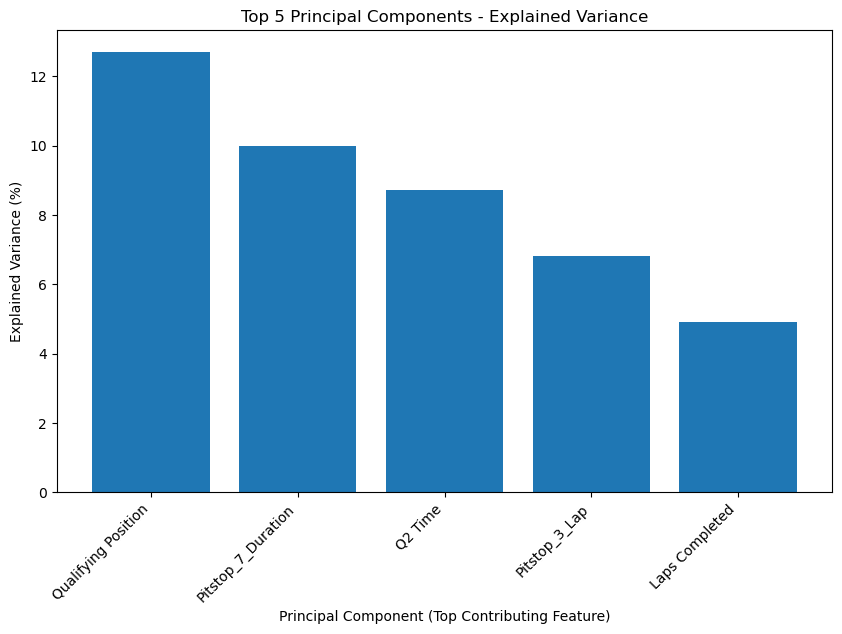

In [37]:
# Ensure only numerical columns are used
df_numeric = df.select_dtypes(include=[np.number])

# Get explained variance ratios
explained_variance = pca_full.explained_variance_ratio_[:5]  # Top 5 components
columns = df_numeric.columns  # Column names of original data

# Identify the top contributing feature for each principal component
top_features = []
for i in range(5):
    # Get the index of the feature with the highest absolute weight in this principal component
    top_feature_index = np.argmax(abs(pca_full.components_[i]))
    # Append the corresponding feature name
    top_features.append(columns[top_feature_index])

# Create DataFrame for top 5 principal component contributions
top_5_components = pd.DataFrame(pca_full.components_[:5], columns=columns, index=top_features)

# Plot explained variance with feature names as labels
plt.figure(figsize=(10, 6))
plt.bar(top_features, explained_variance * 100)
plt.xlabel("Principal Component (Top Contributing Feature)")
plt.ylabel("Explained Variance (%)")
plt.title("Top 5 Principal Components - Explained Variance")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.show()

##### Visualizing PCA Results

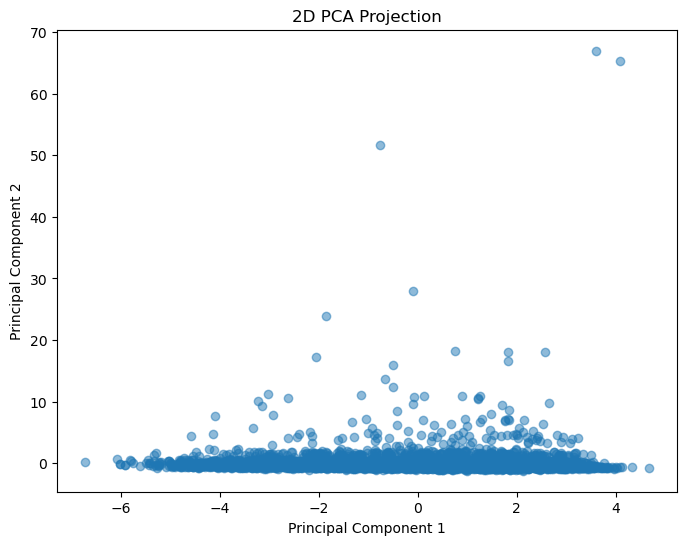

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2[:, 0], df_pca_2[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.show()

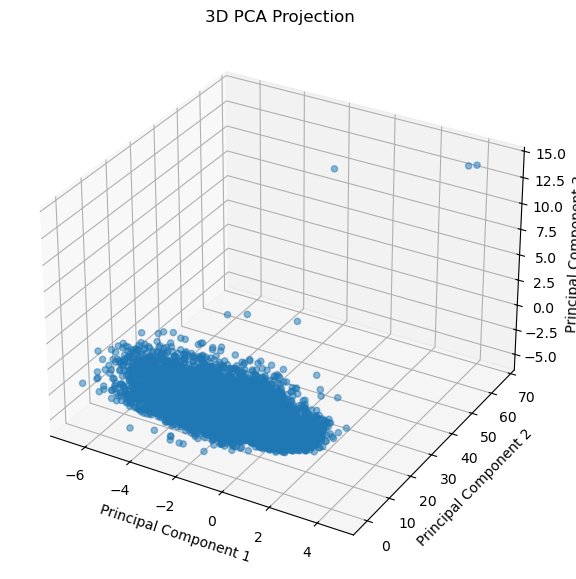

In [97]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2], alpha=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")
plt.show()

### 2. Clustering

- Cluster 0: Drivers who finished outside the top 3
- Cluster 1: Drivers who finished in the top 3 (Podium Finishers)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Loading dataset
df = pd.read_csv("cleaned_f1_data.csv")

# Creating a binary label: 1 if Final Position is in top 3, else 0
df["Top3"] = (df["Final Position"] <= 3).astype(int)

# Removing the Final Position column for clustering (we save it separately)
df_unlabeled = df.drop(columns=["Final Position", "Top3"])  # Keep only numeric features

In [104]:
df.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position,Top3
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0


In [106]:
df_unlabeled.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_5_Lap,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unlabeled)

In [110]:
# (Optional) Reduce to 3D using PCA for visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

In [112]:
# Check variance retained
variance_retained = np.sum(pca.explained_variance_ratio_) * 100
print(f"Variance retained after PCA (3D): {variance_retained:.2f}%")

Variance retained after PCA (3D): 30.36%


#### 2.1. K-Means Clustering (2 Clusters)

In [116]:
# Finding the best K using Silhouette Score
range_n_clusters = [2, 3, 4, 5, 6]
best_k = 0
best_score = -1

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"K={k}, Silhouette Score: {silhouette_avg:.4f}")
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"Best K: {best_k} with Silhouette Score: {best_score:.4f}")

K=2, Silhouette Score: 0.3933
K=3, Silhouette Score: 0.1116
K=4, Silhouette Score: 0.0993
K=5, Silhouette Score: 0.1006
K=6, Silhouette Score: 0.0855
Best K: 2 with Silhouette Score: 0.3933


Top3        0    1
Cluster           
0         386   50
1        5135  825


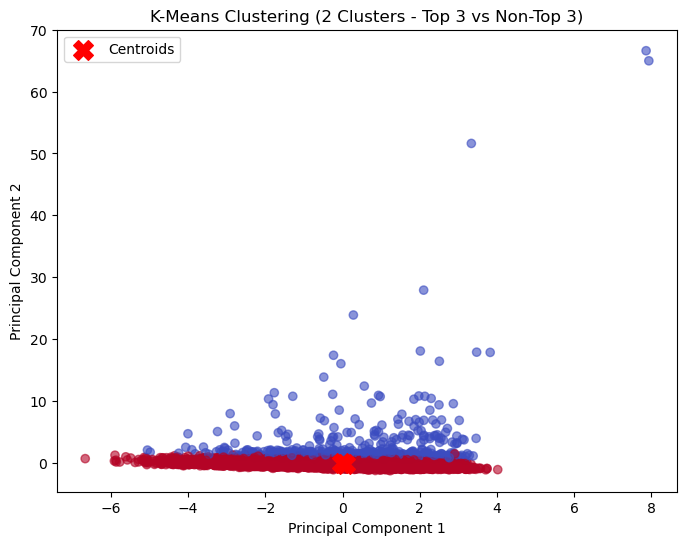

In [126]:
# Apply K-Means with Best K
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Compare clusters with actual top 3 labels
cluster_comparison = pd.crosstab(df["Cluster"], df["Top3"])
print(cluster_comparison)

# Visualizing the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="coolwarm", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (2 Clusters - Top 3 vs Non-Top 3)")
plt.legend()
plt.show()

Top3        0    1
Cluster           
0          98   14
1        1467  847
2        3956   14


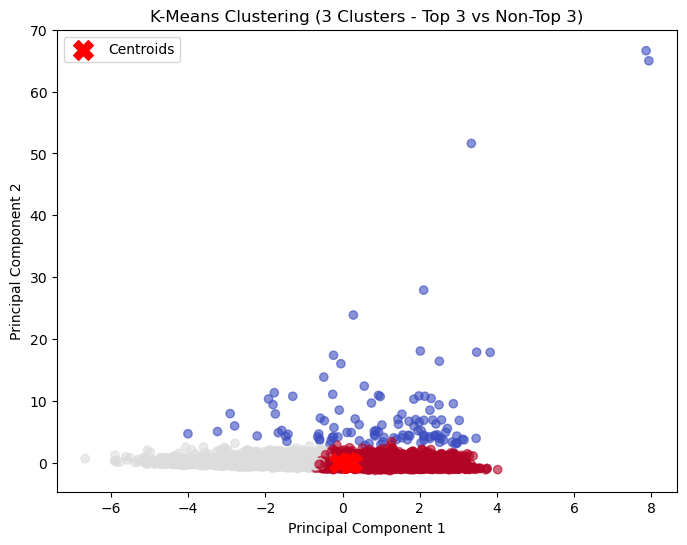

In [140]:
# Apply K-Means with Second Best K
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Compare clusters with actual top 3 labels
cluster_comparison = pd.crosstab(df["Cluster"], df["Top3"])
print(cluster_comparison)

# Visualizing the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="coolwarm", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (3 Clusters - Top 3 vs Non-Top 3)")
plt.legend()
plt.show()

Top3        0    1
Cluster           
0          95   14
1        1005  546
2        1497  306
3        2921    9
4           3    0


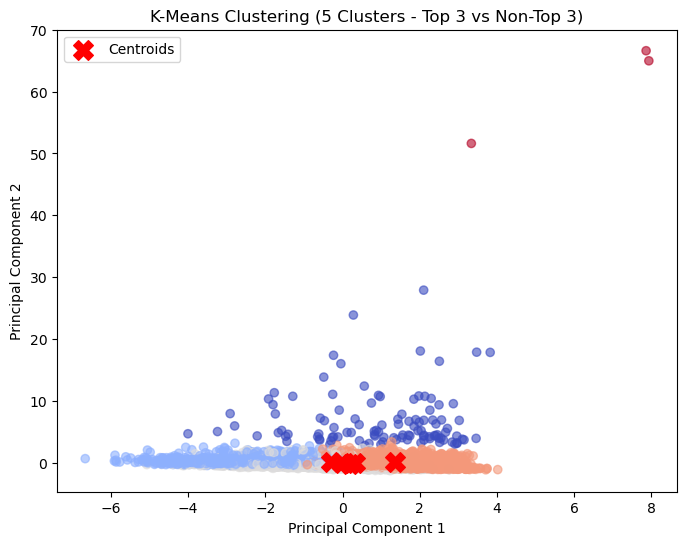

In [138]:
# Apply K-Means with Third Best K
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Compare clusters with actual top 3 labels
cluster_comparison = pd.crosstab(df["Cluster"], df["Top3"])
print(cluster_comparison)

# Visualizing the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="coolwarm", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (5 Clusters - Top 3 vs Non-Top 3)")
plt.legend()
plt.show()

### **Analysis of Clustering Results**

#### **1. K = 5 Clusters**
**Observations:**
- The **centroids** are spread across the dataset, but there is **no clear separation** between top 3 and non-top 3 finishers.
- Some clusters have **both podium finishers and non-podium finishers**, meaning **5 clusters** might be too many for a binary problem.
- The silhouette analysis likely suggested that **K=5 was not ideal**.

**Conclusion:**  
Using **K=5 results in over-segmentation** where multiple clusters contain **both categories**, reducing clarity.

#### **2. K = 3 Clusters**
**Observations:**
- The **number of podium finishers is still mixed across clusters**, but some clusters are now **more distinct**.
- The **centroids are better placed**, but we still see a blend of top 3 and non-top 3 in at least one cluster.
- Compared to **K=5**, this is **an improvement** as fewer clusters create better separation.

**Conclusion:**  
Using **K=3 offers some separation**, but there is still **overlap** between top 3 and non-top 3.

#### **3. K = 2 Clusters (Binary Clustering)**
**Observations:**
- **Clear binary separation between two clusters** aligns with the goal of distinguishing **top 3 vs non-top 3**.
- **Centroids are well placed**, indicating **better differentiation**.
- Some **overlapping points exist**, suggesting that additional features may be needed for perfect separation.

**Conclusion:**  
- **K=2 is the best choice** for our problem since we only want **two categories** (top 3 vs others).  
- Some **misclassification** happens, possibly due to feature selection, PCA dimensionality reduction, or **variability in race conditions**.  
- This clustering model **captures trends well**, though additional fine-tuning (e.g., feature engineering) could improve it.

### **Final Comparison & Recommendation**
| **K Value** | **Pros** | **Cons** | **Best for** |
|------------|---------|---------|--------------|
| **K=5** | Granular separation | Too many clusters, overlaps | Fine-grained segmentation |
| **K=3** | Improved separation | Some podium finishers still mix with non-top 3 | Moderate segmentation |
| **K=2** | Best binary split | Minor misclassification | **Best for this task** |

- **Final Decision:** **K=2 is the best model** for distinguishing **podium finishers from non-podium finishers**.

#### 2.2. Hierarchical Clustering

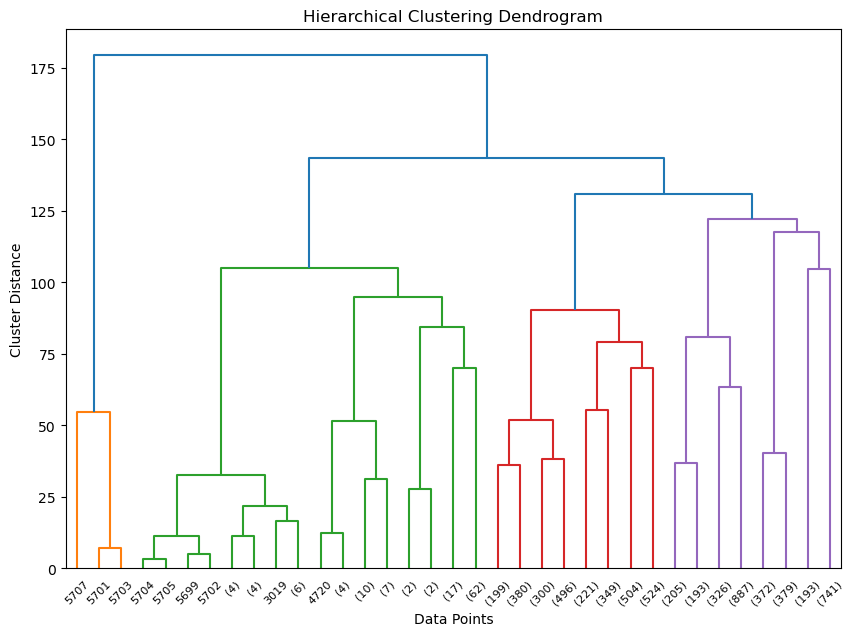

In [133]:
# Performing Hierarchical Clustering
linked = linkage(df_scaled, method='ward')

# Dendrogram Plot
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()

#### **Comparison of Hierarchical Clustering (Dendrogram) vs K-Means Clustering**

#### **1. Key Observations from the Dendrogram (Hierarchical Clustering)**
- The **dendrogram represents a hierarchical structure** where clusters merge step by step.
- The **height of the links** in the tree represents the **distance** between merged clusters.
- The **biggest splits occur at higher cluster distances**, which suggests that the data naturally divides into **two or more groups**.
- Unlike K-Means, **we do not predefine the number of clusters**; instead, we can **cut the dendrogram at a chosen height** to get the desired number of clusters.
- The **natural divisions in the data** suggest that a **binary split (Top 3 vs Non-Top 3) is feasible**, but **more than two clusters might exist** if finer distinctions are needed.
- Some clusters are **closer together (lower merge distance)**, meaning that within the **non-top 3 finishers**, there might be **sub-groups** that have similar performance.

#### **2. Comparison with K-Means Clustering**
| **Aspect**        | **Hierarchical Clustering (Dendrogram)** | **K-Means Clustering** |
|------------------|----------------------------------|------------------|
| **Number of Clusters** | No need to predefine (can be chosen from the dendrogram) | Must predefine K (e.g., K=2, 3, 5) |
| **Structure** | Shows **nested relationships** between data points | Assigns points to **fixed centroids** |
| **Cluster Shapes** | Works well for **non-spherical** clusters | Assumes **spherical clusters** |
| **Performance** | Slower for **large datasets** | **Faster** for large datasets |
| **Flexibility** | Can dynamically **choose different cluster cut-offs** | Fixed **K** may miss the optimal structure |

**Conclusion:**  
- **Hierarchical clustering provides deeper insights** into relationships among drivers beyond a simple top 3 vs non-top 3 split.
- **K-Means is better suited for large datasets** and forces a **clear separation** between two fixed groups.
- The **dendrogram suggests that while two clusters (K=2) work well, there may be further sub-clusters** within the non-top 3 drivers.

#### 2.2.3. DBSCAN

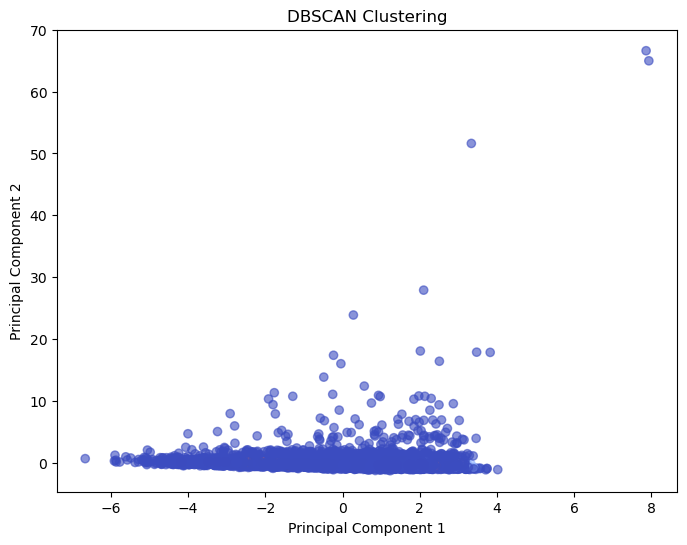

In [136]:
# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

# Visualizing DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["DBSCAN_Cluster"], cmap="coolwarm", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering")
plt.show()

#### **Comparison of DBSCAN Clustering vs K-Means and Hierarchical Clustering**

#### **1. Observations from the DBSCAN Clustering Plot**
- **No clear cluster separation** is visible.
- **Most data points appear in a single cluster**, suggesting **DBSCAN was unable to find distinct dense clusters**.
- **No clear noise points (outliers) are identified**, meaning **DBSCAN’s parameters (eps, min_samples) may need tuning**.
- The lack of cluster differentiation **suggests that PCA-reduced data does not have clearly defined density-based clusters**.
- Thus, **DBSCAN struggles** with datasets where clusters do not have clear **density-based groupings**.
- The **distribution of F1 race data may not have natural high-density clusters**, making DBSCAN less effective.

### **2. Comparison with K-Means and Hierarchical Clustering**
| **Aspect**        | **DBSCAN** | **K-Means** | **Hierarchical Clustering** |
|------------------|-----------|------------|-----------------------------|
| **Cluster Shape** | Detects arbitrarily shaped clusters | Assumes spherical clusters | Creates a hierarchical structure |
| **Handles Outliers?** | Yes, marks them as noise | No, forces assignment | No, every point belongs to a cluster |
| **Works with Sparse Data?** | Yes, if density varies | No, struggles with varying densities | Yes, identifies patterns at multiple levels |
| **Performance** | Slow for large data | Fast and scalable | Slower for large datasets |
| **Result for Top 3 vs Non-Top 3** | **Poor separation** | **Best separation** | **Somewhat useful, reveals relationships** |

**Conclusion:**  
- **K-Means performed best for a strict Top 3 vs Non-Top 3 split**, as it forces two distinct groups.
- **Hierarchical Clustering revealed potential sub-clusters within non-top 3 finishers**.
- **DBSCAN failed to form meaningful clusters**, likely because **race data does not have dense, well-separated natural groups**.

### 3. Associate Rule Mining (ARM)

In [149]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 272.8 kB/s eta 0:00:00a 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [151]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx

# Load the dataset
df = pd.read_csv("cleaned_f1_data.csv")

# Convert Final Position into categories
df["Position Category"] = df["Final Position"].apply(lambda x: "Top 3" if x <= 3 else "Non-Top 3")

In [153]:
# Prepare data for transactional format
transactions = df.groupby(["Season", "Race Name"])["Position Category"].apply(list).tolist()

In [166]:
transactions

[['Top 3',
  'Top 3',
  'Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3'],
 ['Top 3',
  'Top 3',
  'Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3'],
 ['Top 3',
  'Top 3',
  'Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',
  'Non-Top 3',

In [155]:
# Convert to binary format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [157]:
# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

In [159]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [161]:
# Sort by support, confidence, and lift
rules_sorted_support = rules.sort_values(by="support", ascending=False).head(15)
rules_sorted_confidence = rules.sort_values(by="confidence", ascending=False).head(15)
rules_sorted_lift = rules.sort_values(by="lift", ascending=False).head(15)

# Display results
print("Top 15 Rules by Support:\n", rules_sorted_support)
print("\nTop 15 Rules by Confidence:\n", rules_sorted_confidence)
print("\nTop 15 Rules by Lift:\n", rules_sorted_lift)

Top 15 Rules by Support:
    antecedents  consequents  antecedent support  consequent support   support  \
0  (Non-Top 3)      (Top 3)            1.000000            0.996721  0.996721   
1      (Top 3)  (Non-Top 3)            0.996721            1.000000  0.996721   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
0    0.996721   1.0               1.0       0.0         1.0            0.0   
1    1.000000   1.0               1.0       0.0         inf            0.0   

    jaccard  certainty  kulczynski  
0  0.996721        0.0    0.998361  
1  0.996721        0.0    0.998361  

Top 15 Rules by Confidence:
    antecedents  consequents  antecedent support  consequent support   support  \
1      (Top 3)  (Non-Top 3)            0.996721            1.000000  0.996721   
0  (Non-Top 3)      (Top 3)            1.000000            0.996721  0.996721   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
1    1.000000   1.0             

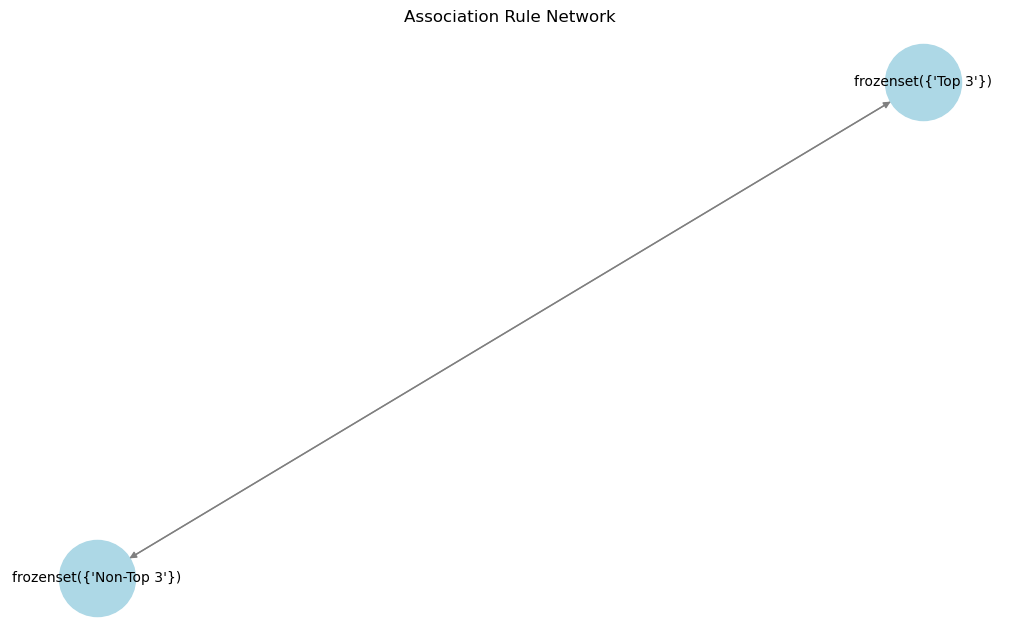

In [163]:
# Create a Network Graph for Association Rules
G = nx.DiGraph()

for i, row in rules_sorted_lift.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Association Rule Network")
plt.show()

### 3. Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("cleaned_f1_data.csv")
df['Top3'] = (df['Final Position'] <= 3).astype(int)

In [3]:
df.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position,Top3
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0


In [4]:
X = df.drop(['Final Position', 'Top3'], axis=1)
y = df['Top3']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [8]:
# Multinomial NB
mnb = MultinomialNB()
X_train_mnb = (X_train - X_train.min())
X_test_mnb = (X_test - X_train.min())
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)

In [9]:
# Bernoulli NB (binarize features)
X_train_bin = (X_train > X_train.median()).astype(int)
X_test_bin = (X_test > X_train.median()).astype(int)
bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)

In [10]:
# Accuracy and confusion matrix
def show_results(y_test, y_pred, model_name):
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

Gaussian NB Accuracy: 0.72


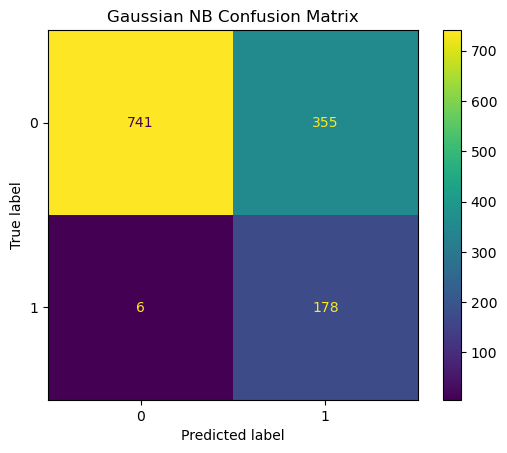

Multinomial NB Accuracy: 0.81


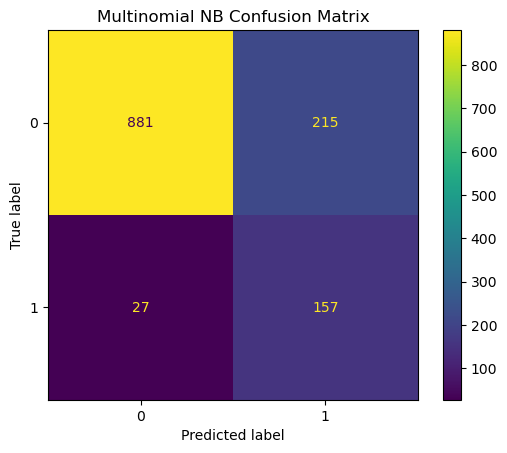

Bernoulli NB Accuracy: 0.80


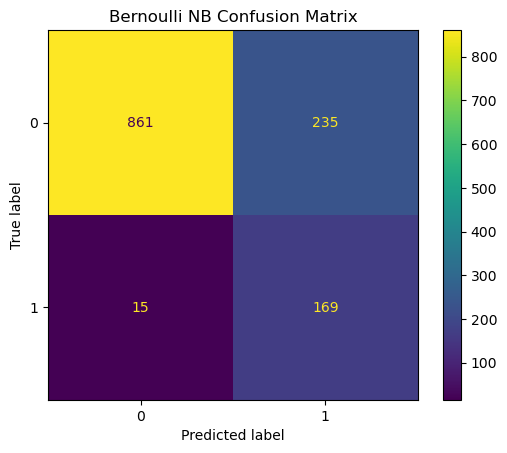

In [13]:
show_results(y_test, y_pred_gnb, "Gaussian NB")
show_results(y_test, y_pred_mnb, "Multinomial NB")
show_results(y_test, y_pred_bnb, "Bernoulli NB")

### 4. Decision Tree

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("cleaned_f1_data.csv")
df.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [16]:
df["Top3"] = (df["Final Position"] <= 3).astype(int)
df.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position,Top3
0,2010,1,5,7,23,3,5,3,114.612,114.172,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,2010,1,5,7,23,44,5,2,115.313,114.331,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
2,2010,1,5,7,23,25,13,4,115.341,114.707,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2010,1,5,7,23,75,17,1,115.029,113.883,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
4,2010,1,5,7,23,62,14,5,115.463,114.682,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0


In [17]:
X = df.drop(columns=["Final Position", "Top3"])
y = df["Top3"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head(), X_test.head()

(      Season  Round  Race Name  Circuit Name  Location  Driver ID  \
 2840    2016     12         16            17         5         28   
 3475    2018      2          5             7        23          7   
 5149    2022      5         26            25        15         19   
 5079    2022      2         32            20         8         64   
 2594    2016      1          2             0        13         75   
 
       Constructor  Qualifying Position  Q1 Time  Q2 Time  ...  Pitstop_5_Lap  \
 2840            6                    7   76.301   75.623  ...              0   
 3475           14                    3   89.275   88.794  ...              0   
 5149            1                    7   90.779   90.128  ...              0   
 5079           14                    6   89.680   89.618  ...              0   
 2594            5                    3   86.945   85.257  ...              0   
 
       Pitstop_6_Lap  Pitstop_7_Lap  Pitstop_1_Duration  Pitstop_2_Duration  \
 2840      

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Default Tree
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)
y_pred1 = tree1.predict(X_test)

In [22]:
# Tree with depth constraint
tree2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree2.fit(X_train, y_train)
y_pred2 = tree2.predict(X_test)

In [23]:
# Tree using entropy instead of gini
tree3 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

In [24]:
def evaluate_tree(y_test, y_pred, model, title):
    print(f"{title} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{title} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(15, 8))
    plot_tree(model, filled=True, max_depth=3, fontsize=10)
    plt.title(f"{title} (First 3 Levels)")
    plt.show()

Default Tree Accuracy: 1.00


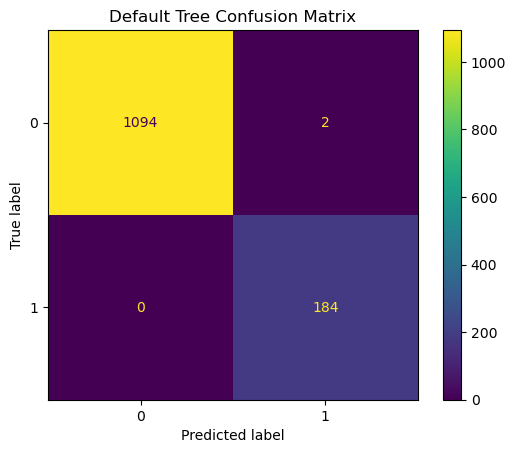

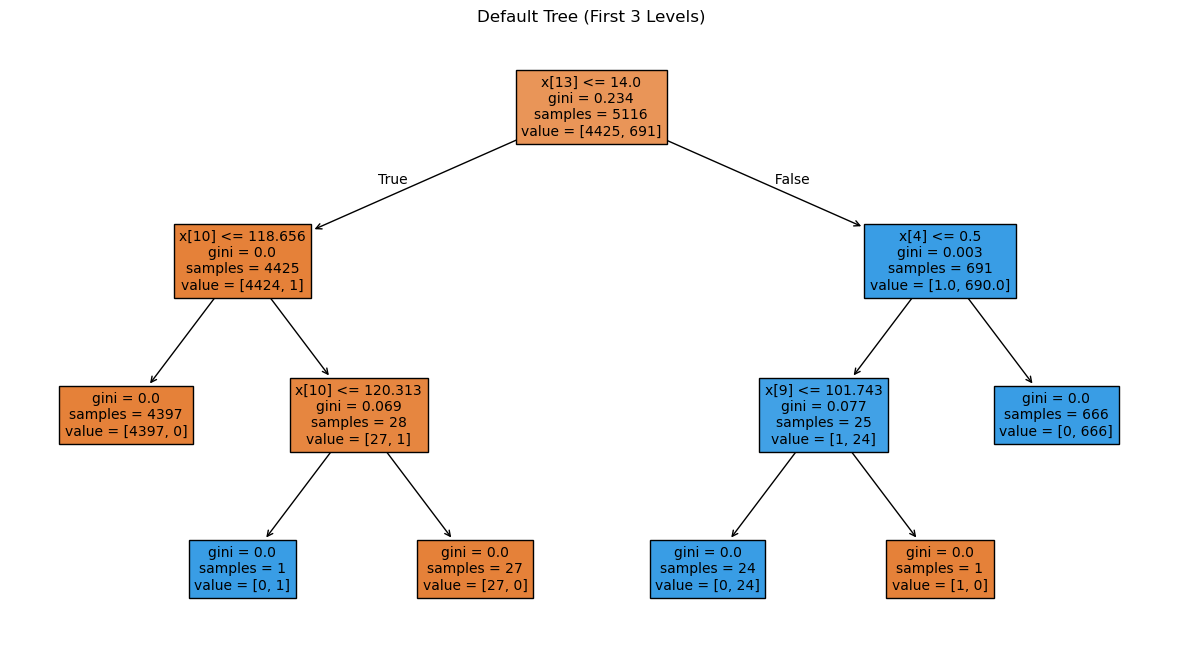

Max Depth = 5 Tree Accuracy: 1.00


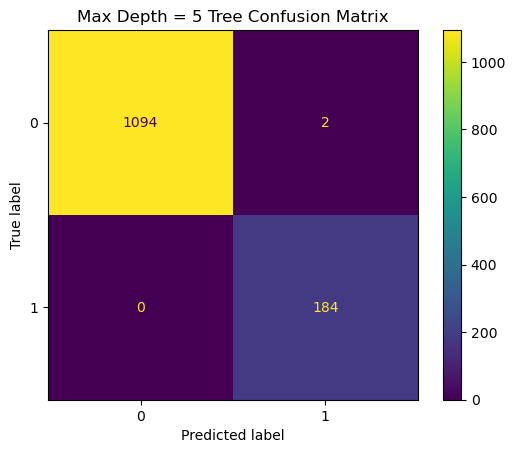

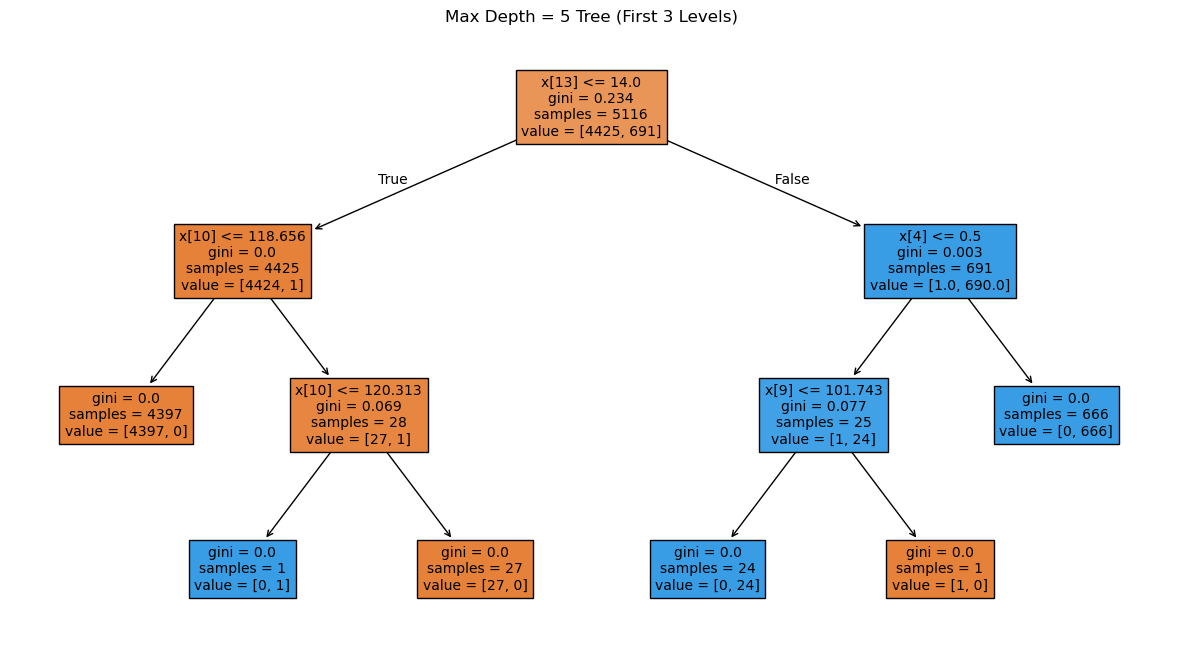

Entropy-based Tree Accuracy: 1.00


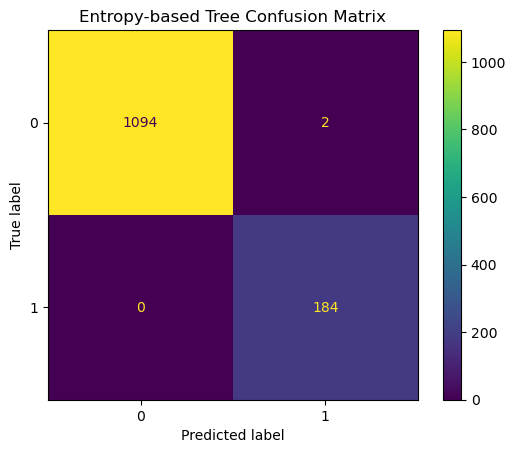

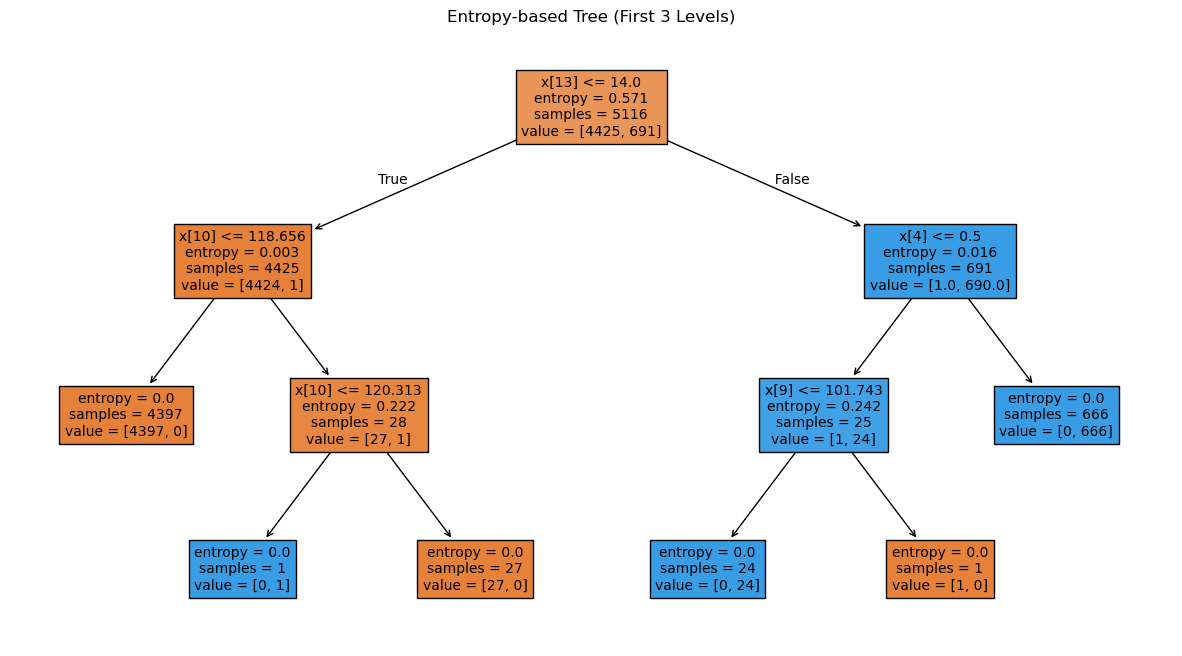

In [25]:
evaluate_tree(y_test, y_pred1, tree1, "Default Tree")
evaluate_tree(y_test, y_pred2, tree2, "Max Depth = 5 Tree")
evaluate_tree(y_test, y_pred3, tree3, "Entropy-based Tree")

### 5. Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Reusing X_train, X_test, y_train, y_test from the previous model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Comparing with Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [30]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

Logistic Regression Accuracy: 1.00


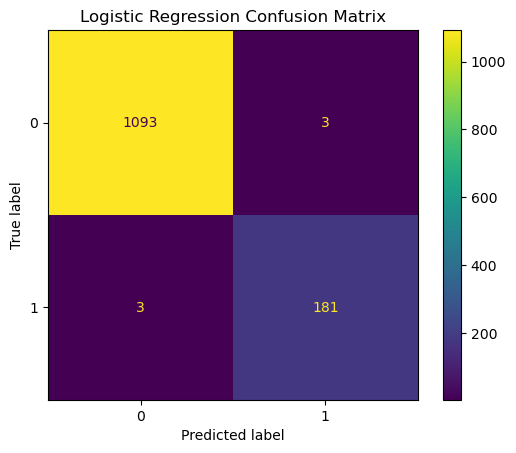

Gaussian NB Accuracy: 0.72


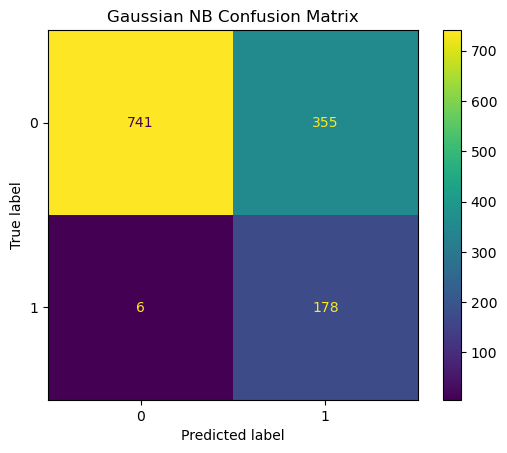

In [31]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_gnb, "Gaussian NB")